<font color='blue'> **07b __________________________________ GeostatsPy_variogram_from_image_** </font> 

In [10]:
import os; import sys ; from pathlib import Path    ; _R = Path("_R")   ; _R.mkdir(exist_ok=True); TA = Path('_R/07b__GeostatsPy_variogram_from_image_'); TA.mkdir(exist_ok=True)
import numpy as np    ; import pandas as pd ; import matplotlib.pyplot as plt     ; import geostatspy.GSLIB as GSLIB      
import geostatspy.GSLIB as GSLIB  ; import geostatspy.geostats as geostats        ; import geostatspy   ; from matplotlib.patches import Rectangle ; ignore_warnings = True                                        
if ignore_warnings == True:                                   
    import warnings ; warnings.filterwarnings('ignore')
import math ; from ipywidgets import interactive ; from ipywidgets import widgets ; from ipywidgets import Layout ; from ipywidgets import Label ; from ipywidgets import VBox, HBox
REF2 = Path('E:/15_REPOS/02_Beta-Me/data/Beta'); REF1 = Path('E:/15_REPOS/02_Beta-Me/data/Krig/GeostatsPy')  # df.to_csv(REF1/'sample_data_biased.csv')   
sys.path.append('E:/15_REPOS/02_Beta-Me/data/Krig/GeostatsPy')  ; from Variogram import GAM ; plt.rc('axes', axisbelow=True) ; cmap = plt.cm.inferno  
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator) ; import imageio ; from scipy import stats  ; import scipy.signal as signal ; import random

Image size, ny = 879, nx=2000 pixels | in Greyscale


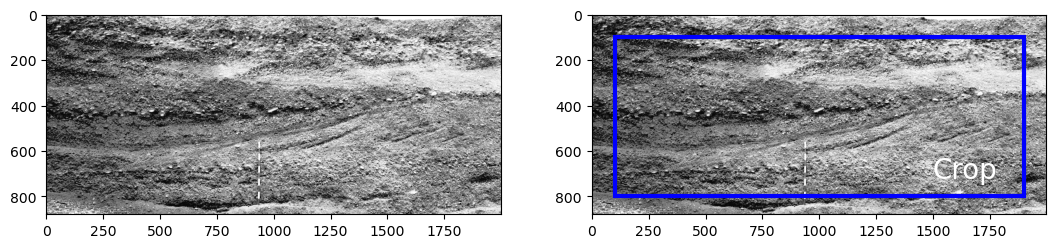

In [11]:
image = imageio.imread(REF2/'outcrop.jpg')                  ;nys=100 ;nye=800   ;nxs=100 ;nxe=1900
#image = imageio.imread(REF1/'Holstein-Cows-Origins.jpg')   ;nys=200 ;nye=500   ;nxs=0 ;nxe=800      
ny = image.shape[0]   ; nx = image.shape[1]  ; imageBW = np.zeros([ny,nx])  
for ix in range(0, nx):                                       
    for iy in range(0, ny):
        imageBW[iy,ix] = int(255) - (int(image[iy,ix,0])+int(image[iy,ix,1])+int(image[iy,ix,2])) /3
n='n'      ;print('Image size, ny = '+str(ny)+', nx='+str(nx),'pixels | in Greyscale')                               ; imageBWcrop = imageBW[nys:nye,nxs:nxe] 
fig = plt.figure(figsize=(5,1))
plt.subplot(121)  ; plt.imshow(imageBW,cmap=plt.cm.Greys)                     ; plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=2.2, wspace=0.2, hspace=0.3)
plt.subplot(122)  ; plt.imshow(imageBW,cmap=plt.cm.Greys)                     ; rect = plt.Rectangle((nxs,nys),nxe-nxs,nye-nys,linewidth=3, edgecolor='b', facecolor='none')
plt.annotate('Crop',((nxe+nxs)*0.75,((nye+nys)*0.8)),color='white',fontsize=20)  ; plt.gca().add_patch(rect)  ; plt.show() ; pd.DataFrame(imageBWcrop).to_csv(TA/'outcrop.csv')

In [3]:
print('nx:', imageBWcrop.shape[1],'ny:',imageBWcrop.shape[0], '...|Z|max:',int(imageBWcrop.max()))

nx: 1800 ny: 700 ...|Z|max: 255


In [4]:
nlagx,variox,nppx = geostats.gam(imageBWcrop,tmin=-9999,tmax=9999  ,
                                 xsiz=1.0,ysiz=1.0  ,       # grid cell 
                                 ixd=15,iyd=0,              # lag offset   (20)1800/20=90  ..(15)1800/15=120
                                 nlag=120,isill=1.0)        # ___1:52                      ..___2:21 
nlagy,varioy,nppy = geostats.gam(imageBWcrop,tmin=-9999,tmax=9999,
                                 xsiz=1.0,ysiz=1.0,         # grid cell
                                 ixd=0,iyd=10,              # lag offset   (10)700/10=70   ..II
                                 nlag=70,isill=1.0)         # ___1:27                      ..___         

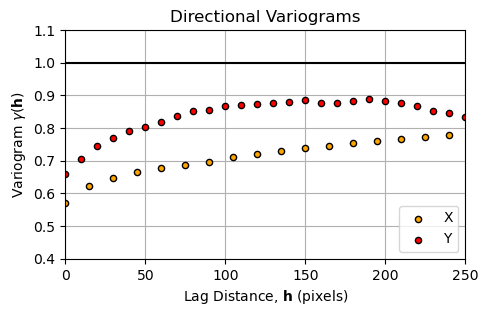

Lx: 1770 Ly: 680


In [5]:
VG = 0.4        # Ommini Diretional ... simple
fig = plt.figure(figsize=(4,3))     # y direction / vertical** - longer spatial continuity range  ; # x direction / horizontal** - shorter spatial continuity range and more cyclicity
plt.subplot(212)  ; plt.scatter(nlagx,variox,s=20,color='orange',edgecolor='black',label='X') 
plt.scatter(nlagy,varioy,s=20,color='red',edgecolor='black',label='Y')                   ; plt.plot([0,250],[1,1],color='black')
plt.xlabel(r'Lag Distance, $\bf{h}$ (pixels)'); plt.ylabel(r'Variogram $\gamma$($\bf{h}$)'); plt.title('Directional Variograms')
plt.xlim([0 ,250]); plt.ylim([VG ,1.1]); plt.grid(); plt.legend(loc='lower right')

plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=1.6, wspace=0.2, hspace=0.1); plt.show()           ; print('Lx:',int(nlagx.max()),'Ly:',int(nlagy.max()))

In [6]:
REF1 = Path('E:/15_REPOS/02_Beta-Me/data/Krig/GeostatsPy')
fraction_data = 0.2; df = pd.read_csv(REF1/'sample_data_MV_biased.csv')                   ;df = df.drop(columns=['Unnamed: 0','Unnamed: 0.1'], axis=1)
if fraction_data < 1.0:      df = df.sample(frac = fraction_data,replace = False,random_state = 73073) 
df = df.reset_index()      ; df['LogPerm'] = np.log(df['Perm'].values)                   #;df.head()
df.iloc[:,4:8].describe().transpose() 

,count,mean,std,min,25%,50%,75%,max
Porosity,74.0,0.125834,0.031093,0.062169,0.102895,0.126264,0.148840,0.204587
Perm,74.0,73.040451,214.164084,0.300430,2.081215,10.385010,50.841029,1665.384124
AI,74.0,4853.532434,1100.612966,1981.177309,4074.882537,4722.574276,5542.402947,7561.250336
LogPerm,74.0,2.358329,2.086617,-1.202542,0.731083,2.339396,3.928694,7.417811


In [7]:
df.tail(2)

,index,X,Y,Facies,Porosity,Perm,AI,LogPerm
72,145,260.0,69.0,0.0,0.066231,0.424679,6885.780670,-0.856421
73,262,110.0,49.0,0.0,0.088687,2.421278,6658.973916,0.884296
